In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
#Import data
train = pd.read_csv('train.csv',parse_dates=[2,3],dtype={'id':np.object,'vender_id':np.uint8,'passenger_count':np.uint8,
                                                        'pickup_longitude':np.float32,'pickup_latitude':np.float32,
                                                        'dropoff_longitude':np.float32,'dropoff_latitude':np.float32,
                                                        'store_and_fwd_flag':'category','trip_duration':np.int32})
test = pd.read_csv('test.csv',parse_dates=[2],dtype={'id':np.object,'vender_id':np.uint8,'passenger_count':np.uint8,
                                                        'pickup_longitude':np.float32,'pickup_latitude':np.float32,
                                                        'dropoff_longitude':np.float32,'dropoff_latitude':np.float32,
                                                        'store_and_fwd_flag':'category'})

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null uint8
pickup_longitude      1458644 non-null float32
pickup_latitude       1458644 non-null float32
dropoff_longitude     1458644 non-null float32
dropoff_latitude      1458644 non-null float32
store_and_fwd_flag    1458644 non-null category
trip_duration         1458644 non-null int32
dtypes: category(1), datetime64[ns](2), float32(4), int32(1), int64(1), object(1), uint8(1)
memory usage: 75.1+ MB


In [4]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null uint8
pickup_longitude      625134 non-null float32
pickup_latitude       625134 non-null float32
dropoff_longitude     625134 non-null float32
dropoff_latitude      625134 non-null float32
store_and_fwd_flag    625134 non-null category
dtypes: category(1), datetime64[ns](1), float32(4), int64(1), object(1), uint8(1)
memory usage: 25.0+ MB


In [6]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Data exploration

In [66]:
#Date Time exploration
def datetime_con(data):
    data['pu_day'] = data['pickup_datetime'].dt.dayofyear
    data['pu_month'] = data['pickup_datetime'].dt.month
    data['pu_hour'] = data['pickup_datetime'].dt.hour
    data['pu_wday']  = data['pickup_datetime'].dt.dayofweek
    data['pu_minute'] = data['pickup_datetime'].dt.minute
    #data['pu_wkofyear'] = data['pickup_datetime'].dt.weekofyear
    #data['is_weekend'] = data
    

In [67]:
datetime_con(train)
datetime_con(test)
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_day,pu_month,pu_hour,pu_wday,pu_minute,haversine_distances,pu_wkofyear
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,74,3,17,0,24,1.498944,11
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,164,6,0,6,43,1.806017,23
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,11,1,35,6.386902,3
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,97,4,19,2,32,1.485918,14
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,86,3,13,5,30,1.188924,12


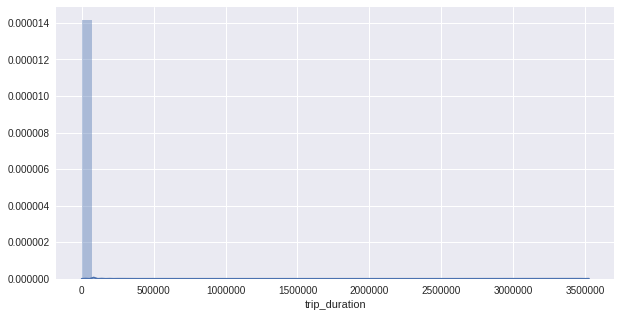

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(train['trip_duration'])

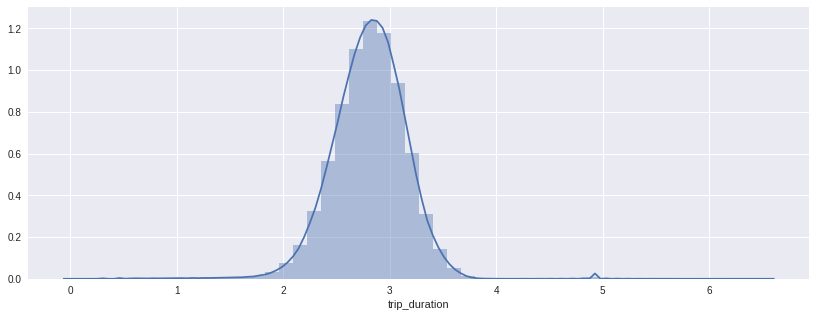

In [10]:
#apply log on traget variable
#train['trip_duration'] = np.log10(train)
plt.figure(figsize=(14,5))
sns.distplot(np.log10(train['trip_duration']))

In [11]:
#mean
u=train['trip_duration'].sum()/(train.shape[0])

In [12]:
#Standard deviation

v=sum((train['trip_duration']-u)**2)/(train.shape[0])
s=v**.5
s,v

(5237.4299291889693, 27430672.263164371)

In [13]:
train['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [14]:
#Check for latitude logitude bound
print('Latitude bound: {} to {}'.format(max(train['pickup_latitude'].min(),train['dropoff_latitude'].min()),
                                          max( train['pickup_latitude'].max(), train['dropoff_latitude'].max())))

print('Longitude bound: {} to {}'.format(max(train['pickup_longitude'].min(), train['dropoff_longitude'].min()),
                                        max(train['pickup_longitude'].max(),train['dropoff_longitude'].max())))

#Check for passenger count
print('Passenger:{} to {}'.format(train['passenger_count'].min(),train['passenger_count'].max()))

#Check for trip duration
print('Trip duration in seconds: {} to{}'.format(train['trip_duration'].min(), train['trip_duration'].max()))

#Check for datetime
print('Date and time: {} to {}'.format(train['pickup_datetime'].min(),train['dropoff_datetime'].max()))

Latitude bound: 34.35969543457031 to 51.88108444213867
Longitude bound: -121.93330383300781 to -61.33552932739258
Passenger:0 to 9
Trip duration in seconds: 1 to3526282
Date and time: 2016-01-01 00:00:17 to 2016-07-01 23:02:03


In [15]:
#Determine distance 
#https://rosettacode.org/wiki/Haversine_formula
from math import radians, sin, cos, sqrt, asin
def haversine(columns):
  lat1, lon1, lat2, lon2 = columns
  R = 6372.8 # Earth radius in kilometers
 
  dLat = radians(lat2 - lat1)
  dLon = radians(lon2 - lon1)
  lat1 = radians(lat1)
  lat2 = radians(lat2)
 
  a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
  c = 2*asin(sqrt(a))
 
  return R * c

cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = train[cols].apply(lambda x: haversine(x),axis = 1)
train['haversine_distances'] = distances.copy()
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_day,pu_month,pu_hour,pu_wday,pu_minute,haversine_distances
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,74,3,17,0,24,1.498944
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,164,6,0,6,43,1.806017
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,11,1,35,6.386902
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,97,4,19,2,32,1.485918
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,86,3,13,5,30,1.188924


In [16]:
cols = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
distances = test[cols].apply(lambda x: haversine(x),axis = 1)
test['haversine_distances'] = distances.copy()
test.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pu_day,pu_month,pu_hour,pu_wday,pu_minute,haversine_distances
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,182,6,23,3,59,2.747202
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,182,6,23,3,59,2.760019
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,182,6,23,3,59,1.306524
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,182,6,23,3,59,5.270576
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,182,6,23,3,59,0.961113


In [17]:
train['haversine_distances'].describe()

count    1.458644e+06
mean     3.441836e+00
std      4.297752e+00
min      0.000000e+00
25%      1.232185e+00
50%      2.094309e+00
75%      3.876432e+00
max      1.241259e+03
Name: haversine_distances, dtype: float64

In [18]:
#Remove outlier
lowq , highq =1,99

#Remove outlier data haversine_distances and Trip duration
lowdp, highdp = np.percentile(train['haversine_distances'],[lowq , highq])
print('Quartile of Haversine Distance: {} to {}'.format(lowdp, highdp))

train_temp = train[train['haversine_distances'] < highdp]
train_temp = train_temp[train_temp['haversine_distances'] > lowdp]

lowdp, highdp = np.percentile(train['trip_duration'],[lowq , highq])
print('Quartile of Trip duration: {} to {}'.format(lowdp, highdp))

train_temp = train_temp[train_temp['trip_duration'] < highdp]
train_temp = train_temp[train_temp['trip_duration'] > lowdp]

print('Number of outlier data removed: {}'.format( train.shape[0]-train_temp.shape[0]))
train = train_temp
train.shape

Quartile of Haversine Distance: 0.13906150947775497 to 20.793392249002004
Quartile of Trip duration: 87.0 to 3440.0
Number of outlier data removed: 47351


(1411293, 17)

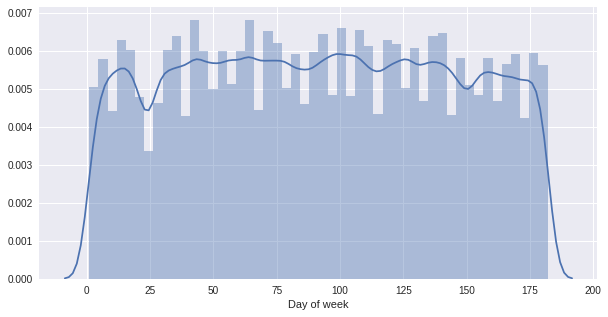

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(train['pu_day'])
plt.xlabel('Day of week')

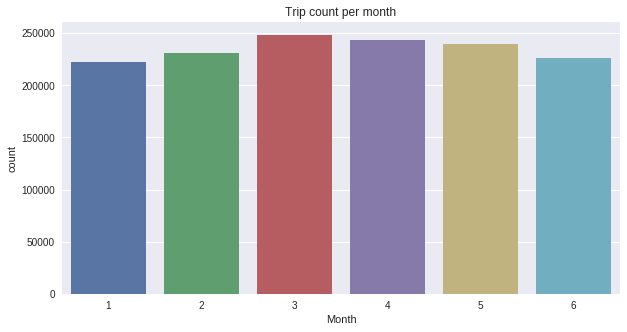

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='pu_month',data=train)
plt.xlabel('Month')
plt.title('Trip count per month')

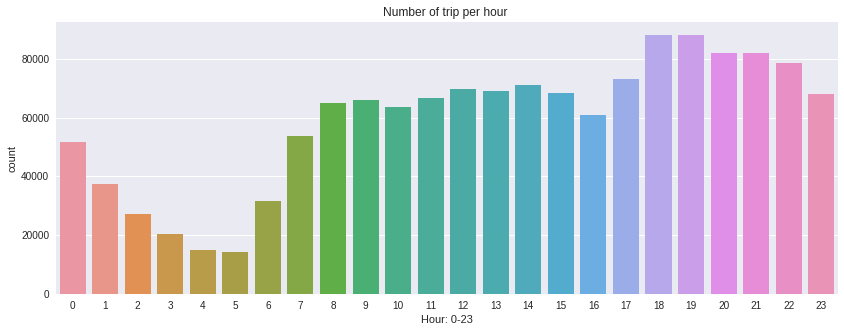

In [21]:
plt.figure(figsize=(14,5))
sns.countplot(x='pu_hour',data=train)
plt.xlabel('Hour: 0-23')
plt.title('Number of trip per hour ')

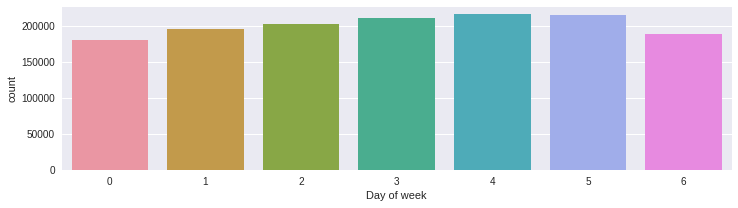

In [22]:
plt.figure(figsize=(12,3))
sns.countplot(x='pu_wday',data=train)
plt.xlabel('Day of week')

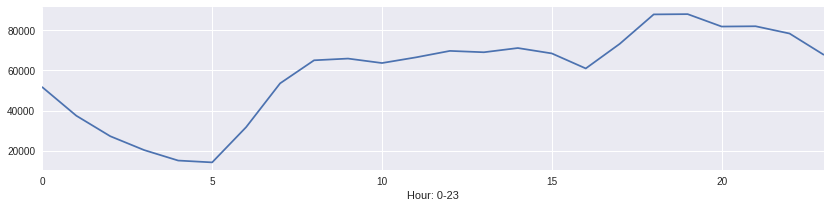

In [23]:
plt.figure(figsize=(14,3))
train.groupby('pu_hour').count()['id'].plot()
plt.xlabel('Hour: 0-23')

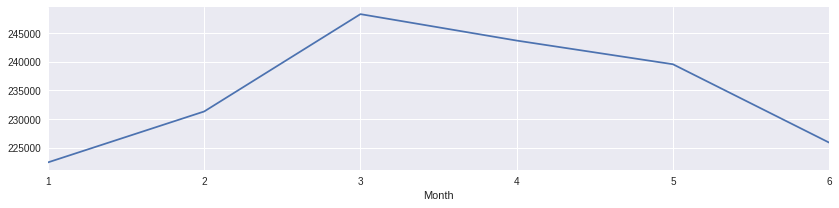

In [24]:
plt.figure(figsize=(14,3))
train.groupby('pu_month').count()['id'].plot()
plt.xlabel('Month')

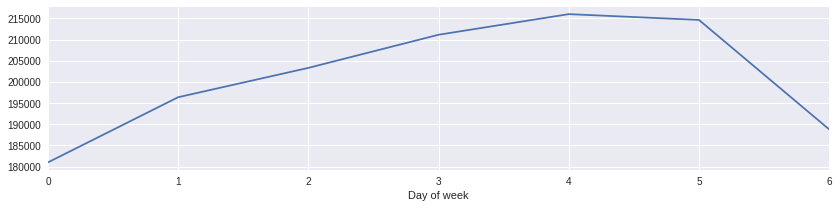

In [25]:
plt.figure(figsize=(14,3))
train.groupby('pu_wday').count()['id'].plot()
plt.xlabel('Day of week')

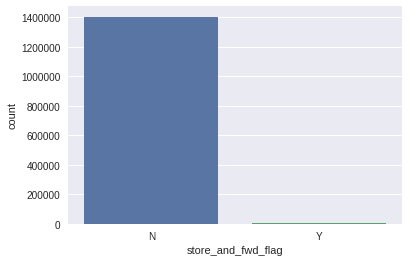

In [26]:
sns.countplot(train['store_and_fwd_flag'])

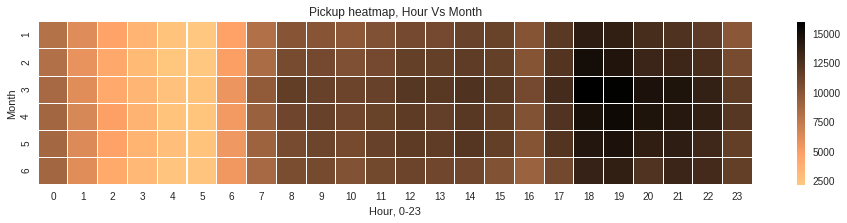

In [27]:
#Pickup heatmap month vs hour
monthVShour= train.groupby(['pu_month','pu_hour']).count()['passenger_count'].unstack()

plt.figure(figsize=(16,3))
sns.heatmap(monthVShour,cmap='copper_r',linewidths=.01)
plt.xlabel('Hour, 0-23')
plt.ylabel('Month')
plt.title('Pickup heatmap, Hour Vs Month')

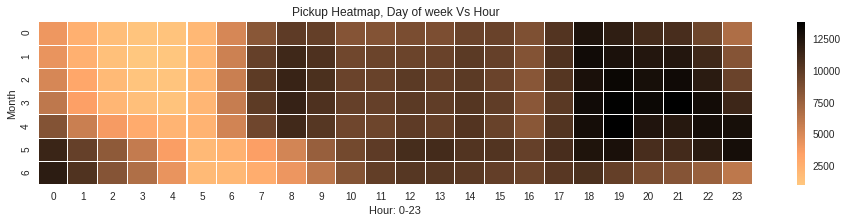

In [28]:
# Pickup Heatmap, Day of week Vs Hour
wdayVshour = train.groupby(['pu_wday','pu_hour']).count()['trip_duration'].unstack()

plt.figure(figsize=(16,3))
sns.heatmap(wdayVshour,cmap='copper_r',linewidths=0.01)
plt.xlabel('Hour: 0-23')
plt.ylabel('Month')
plt.title('Pickup Heatmap, Day of week Vs Hour')

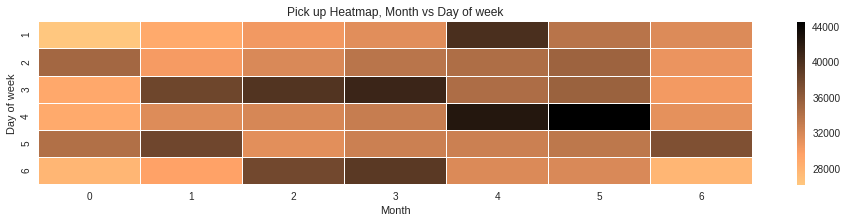

In [29]:
#Pick up Heatmap, Month vs Day of week
monthVswday = train.groupby(['pu_month','pu_wday']).count()['id'].unstack()

plt.figure(figsize=(16,3))
sns.heatmap(monthVswday,linewidths=.005,cmap='copper_r')

plt.title('Pick up Heatmap, Month vs Day of week')
plt.xlabel('Month')
plt.ylabel('Day of week')

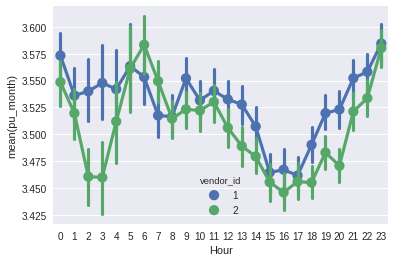

In [30]:
sns.pointplot(x='pu_hour',y='pu_month',data=train,hue='vendor_id')
plt.xlabel('Hour')

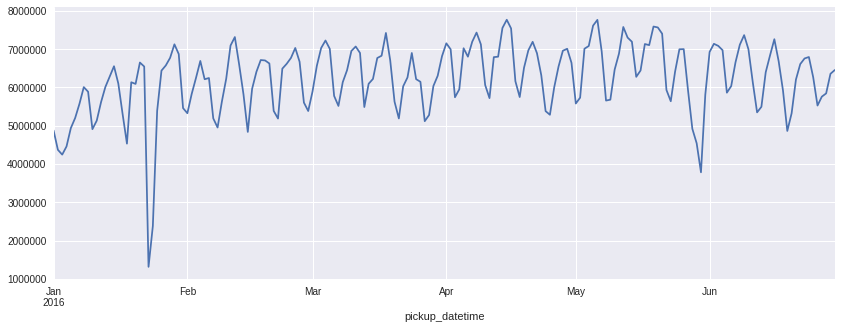

In [31]:
# Time series forcast
plt.figure(figsize=(14,5))
ts = pd.Series(np.array(train['trip_duration']),index=train['pickup_datetime'])
ts.resample('D').sum().plot()


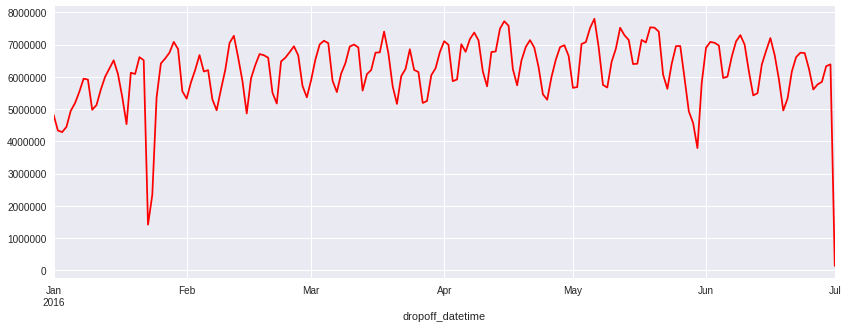

In [32]:
plt.figure(figsize=(14,5))
ts2 = pd.Series(np.array(train['trip_duration']),index=train['dropoff_datetime'])
ts2.resample('D').sum().plot(color='red')

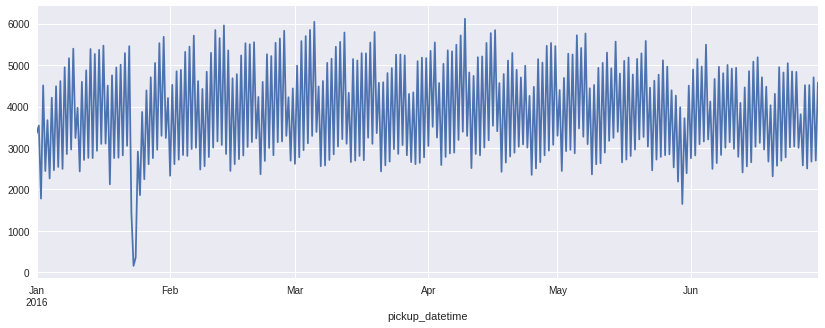

In [33]:
plt.figure(figsize=(14,5))
ts.resample('12H').count().plot()

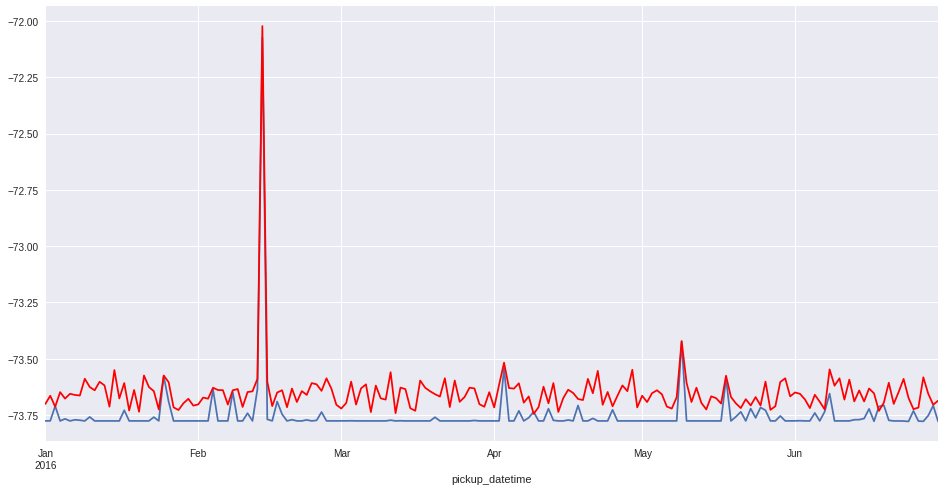

In [34]:
plt.figure(figsize=(16,8))
train.resample('D',on='pickup_datetime').max()['pickup_longitude'].plot()
train.resample('D',on='pickup_datetime').max()['dropoff_longitude'].plot(color='red')

In [35]:
#Map
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, plot,iplot, init_notebook_mode
init_notebook_mode(connected=True)

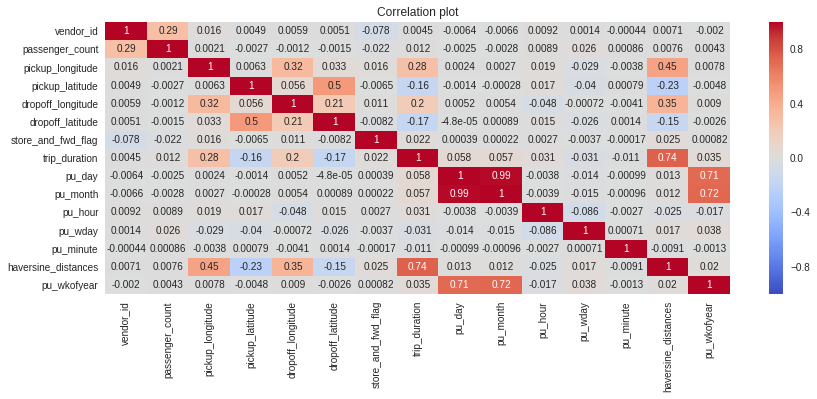

In [65]:
tc = train.corr()
plt.figure(figsize=(14,5))
sns.heatmap(tc,annot=True,cmap='coolwarm')
plt.title("Correlation plot")

In [37]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
def encode(data):
    le = LabelEncoder()
    data['store_and_fwd_flag'] = le.fit_transform(data['store_and_fwd_flag'])
    return train
encode(train)
encode(test)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pu_day,pu_month,pu_hour,pu_wday,pu_minute,haversine_distances
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,74,3,17,0,24,1.498944
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,164,6,0,6,43,1.806017
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,11,1,35,6.386902
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,97,4,19,2,32,1.485918
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,86,3,13,5,30,1.188924
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,443,30,1,22,5,1,1.099253
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,0,341,169,6,22,4,34,1.326653
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,142,5,7,5,54,5.716595
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,0,255,148,5,23,4,12,1.310723
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,0,1225,70,3,21,3,45,5.122608


# Feature selection

In [38]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pu_day', 'pu_month', 'pu_hour', 'pu_wday',
       'pu_minute', 'haversine_distances'],
      dtype='object')

In [39]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'pu_day', 'pu_month',
       'pu_hour', 'pu_wday', 'pu_minute', 'haversine_distances'],
      dtype='object')

In [40]:
Xcol = [ 'vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'pu_month', 'pu_hour', 
        'pu_wday','pu_minute','haversine_distances']
X_train = train[Xcol]
y_train = train['trip_duration']

X_test = test[Xcol]

from sklearn.cross_validation import train_test_split

Tx_train,Tx_test,Ty_train,Ty_test = train_test_split(X_train,y_train,test_size=0.3,random_state=0)
Ty_train.head()

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



896343      470
805569      871
1041608     799
432797      653
295208     2269
Name: trip_duration, dtype: int32


Model building

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Tx_train,(Ty_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
y_pred = model.predict(Tx_test)
y_pred = (y_pred)
print(y_pred[0:5])

print('R**2:',model.score(Tx_test,Ty_test))

[  500.16441923   949.80086695   530.53918659   671.09052663  1369.10119058]
R**2: 0.570540720795


In [43]:
# Transform log base 10 value to linear
#y_pred = 10 **y_pred
#y_pred[0:5]

R**2 -0.324378782544
Adjusted R**2 -0.32439004363


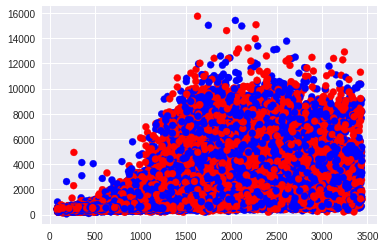

In [53]:
#Model Evaluvation
SS_Residual = sum((Ty_test-y_pred)**2)
SS_Total = sum((Ty_test-np.mean(Ty_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print ('R**2',r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Adjusted R**2',adjusted_r_squared)

plt.scatter(Ty_test,y_pred,c=('r','b'))


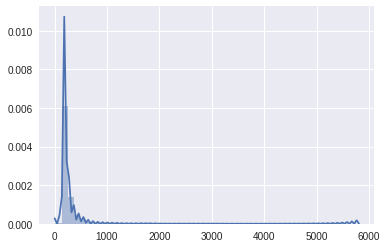

In [56]:
sns.distplot(y_pred)

In [46]:
#Building optimal model using backward elimination
import statsmodels.formula.api as sm

X = np.append(arr=np.ones((X_train.shape[0],1)).astype(int),values= X_train.values,axis=1)
X_opt = X
model_ols = sm.OLS(endog=(y_train.values),exog=X_opt).fit()
model_ols.summary()
#model_ols.rsquared
# NO need of backward elimination

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                 1.568e+05
Date:                Mon, 28 Aug 2017   Prob (F-statistic):               0.00
Time:                        10:24:30   Log-Likelihood:            -1.0323e+07
No. Observations:             1411293   AIC:                         2.065e+07
Df Residuals:                 1411280   BIC:                         2.065e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.53e+05   1257.865   -121.648      0.000   -1.55e+05   -1.51e+05
x1            -1.8388      0.643     -2.861      0.004      -3.099      -0.579
x2             3.0458      0.243     12.514      0.000       2.569       3.523
x3         -1051.9290     10.458   -100.591      0.000   -1072.425   -1031.433
x4          1218.4084     13.512     90.173      0.000    1191.926    1244.891
x5          -952.6420     10.722    -88.851      0.000    -973.656    -931.628
x6         -1095.0220     11.639    -94.079      0.000   -1117.835   -1072.209
x7            25.5302      4.235      6.028      0.000      17.230      33.831
x8            15.4873      0.182     85.011      0.000      15.130      15.844
x9             4.0326      0.048     83.921      0.000       3.938       4.127
x10          -11.8141      0.157    -75.011      0.000     -12.123     -11.505
x11           -0.1320      0.018     -7.472      0.000      -0.167      -0.097
x12          134.5706      0.113   1188.642      0.000     134.349     134.793
==============================================================================
Omnibus:                   352493.287   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1345040.876
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       7.124   Cond. No.                     5.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Submit solution
#pred = np.exp(model.predict(X_test))-1
pred = np.sqrt(model.predict(X_test)**2)
submit = pd.DataFrame({'id':test['id'],'trip_duration':pred})
submit.to_csv('nyc_predict.csv',index=False)
submit.head()

,id,trip_duration
0,id3004672,811.323100
1,id3505355,806.625429
2,id1217141,659.549665
3,id2150126,1189.350041
4,id1598245,561.060127
